In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset.


In [143]:
# importing dataset
df=pd.read_csv("flight_fare1.csv")
df

,Unnamed: 0,Flight name,Departure_time,Arrival_time,Price,Source,Destination,Duration,No of stop,Date
0,0,Go First,21:55,00:50,7488,Bengaluru,Delhi,2h 55m,Non,26-02-2022
1,1,IndiGo,20:10,23:10,7488,Bengaluru,Delhi,3h,Non,26-02-2022
2,2,Vistara,21:10,23:45,7489,Bengaluru,Delhi,2h 35m,Non,26-02-2022
3,3,Vistara,19:40,22:25,7489,Bengaluru,Delhi,2h 45m,Non,26-02-2022
4,4,Air Asia,19:25,22:15,7489,Bengaluru,Delhi,2h 50m,Non,26-02-2022
...,...,...,...,...,...,...,...,...,...,...
8272,8272,Vistara,10:15,20:55,18505,Kolkata,Hyderabad,10h 40m,2,07-03-2022
8273,8273,Vistara,10:15,20:55,18505,Kolkata,Hyderabad,10h 40m,2,07-03-2022
8274,8274,Vistara,15:20,22:55,18879,Kolkata,Hyderabad,7h 35m,1,07-03-2022
8275,8275,Vistara,10:25,19:55,20075,Kolkata,Hyderabad,9h 30m,2,07-03-2022


In [144]:
# checking shape of dataset
print("The no. of Rows in dataset is: ",df.shape[0],"and no. of columns is ",df.shape[1])

The no. of Rows in dataset is:  8277 and no. of columns is  10


In [145]:
# checking datatype of object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      8277 non-null   int64 
 1   Flight name     8277 non-null   object
 2   Departure_time  8277 non-null   object
 3   Arrival_time    8277 non-null   object
 4   Price           8277 non-null   int64 
 5   Source          8277 non-null   object
 6   Destination     8277 non-null   object
 7   Duration        8277 non-null   object
 8   No of stop      8277 non-null   object
 9   Date            8277 non-null   object
dtypes: int64(2), object(8)
memory usage: 646.8+ KB


In [146]:
df.isnull().sum()

Unnamed: 0        0
Flight name       0
Departure_time    0
Arrival_time      0
Price             0
Source            0
Destination       0
Duration          0
No of stop        0
Date              0
dtype: int64

In [147]:
#checking basic info 
df.describe()

,Unnamed: 0,Price
count,8277.000000,8277.000000
mean,4138.000000,7995.679957
std,2389.508422,3999.594007
min,0.000000,1694.000000
25%,2069.000000,5177.000000
50%,4138.000000,7161.000000
75%,6207.000000,9744.000000
max,8276.000000,33894.000000


In [148]:
#checking unique in dataset
df.nunique().sort_values()

Source               2
Destination          4
No of stop           5
Flight name          6
Date                 9
Departure_time     197
Arrival_time       242
Duration           360
Price             1761
Unnamed: 0        8277
dtype: int64

<AxesSubplot:>

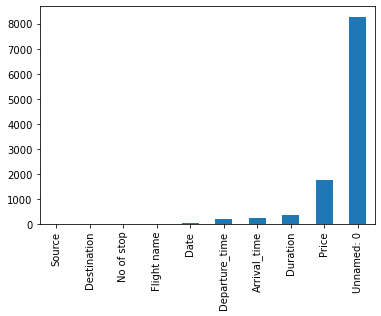

In [149]:
df.nunique().sort_values().plot.bar()


# EDA(Exploratory Data Analysis):


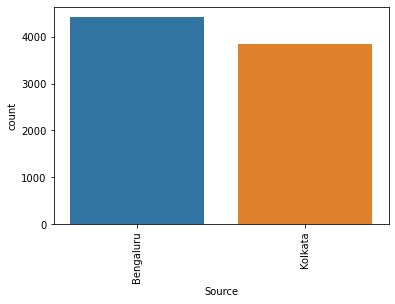

In [150]:
sns.countplot(df["Source"],data=df)
plt.xticks(rotation=90)
plt.show()

for both the location the flight ratio is almost same but their is high in bengaluru and low in kolkata.



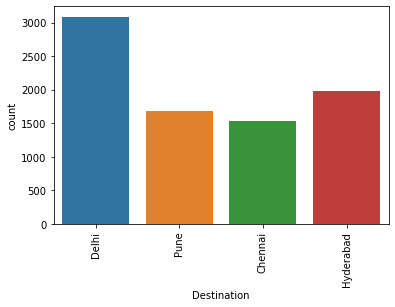

In [151]:
sns.countplot(df["Destination"],data=df)
plt.xticks(rotation=90)
plt.show()

we can see that for delhi destination have more flight than compare to others destination.



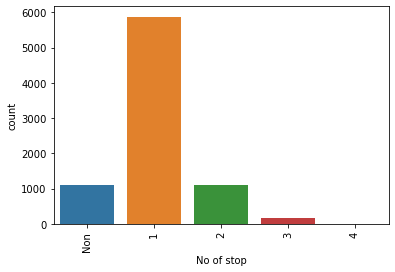

In [152]:
sns.countplot(df["No of stop"],data=df)
plt.xticks(rotation=90)
plt.show()

most of the flights are one stop flight and generally people prefer hault in journey.



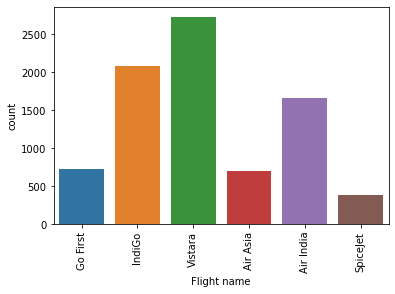

In [153]:
sns.countplot(df["Flight name"],data=df)
plt.xticks(rotation=90)
plt.show()

as we can see vistara has currently most no of flights running,next by indigo and soon,,.



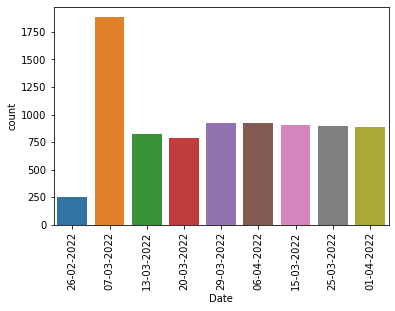

In [154]:
sns.countplot(df["Date"],data=df)
plt.xticks(rotation=90)
plt.show()

Their is high flights on date is 7 march 2022 and their is almost same for all dates other than the 26 february 2022.



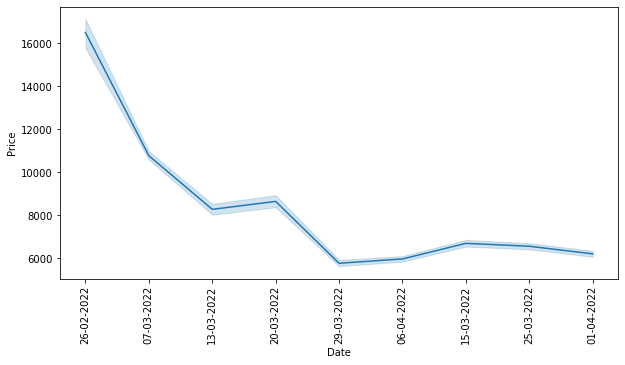

In [155]:
plt.figure(figsize=(10,5))
sns.lineplot(df["Date"],df["Price"])
plt.xticks(rotation=90)
plt.show()

we can see that last minute flight are expensive or the flight whiuch is near some festive occasion are expensive.



<AxesSubplot:xlabel='Price', ylabel='Density'>

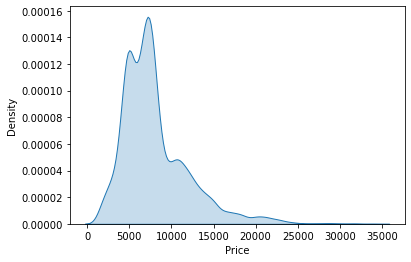

In [156]:
sns.kdeplot(df["Price"],data=df,fill=True)


Price is slightly right skewed.



# Bivariate analysis


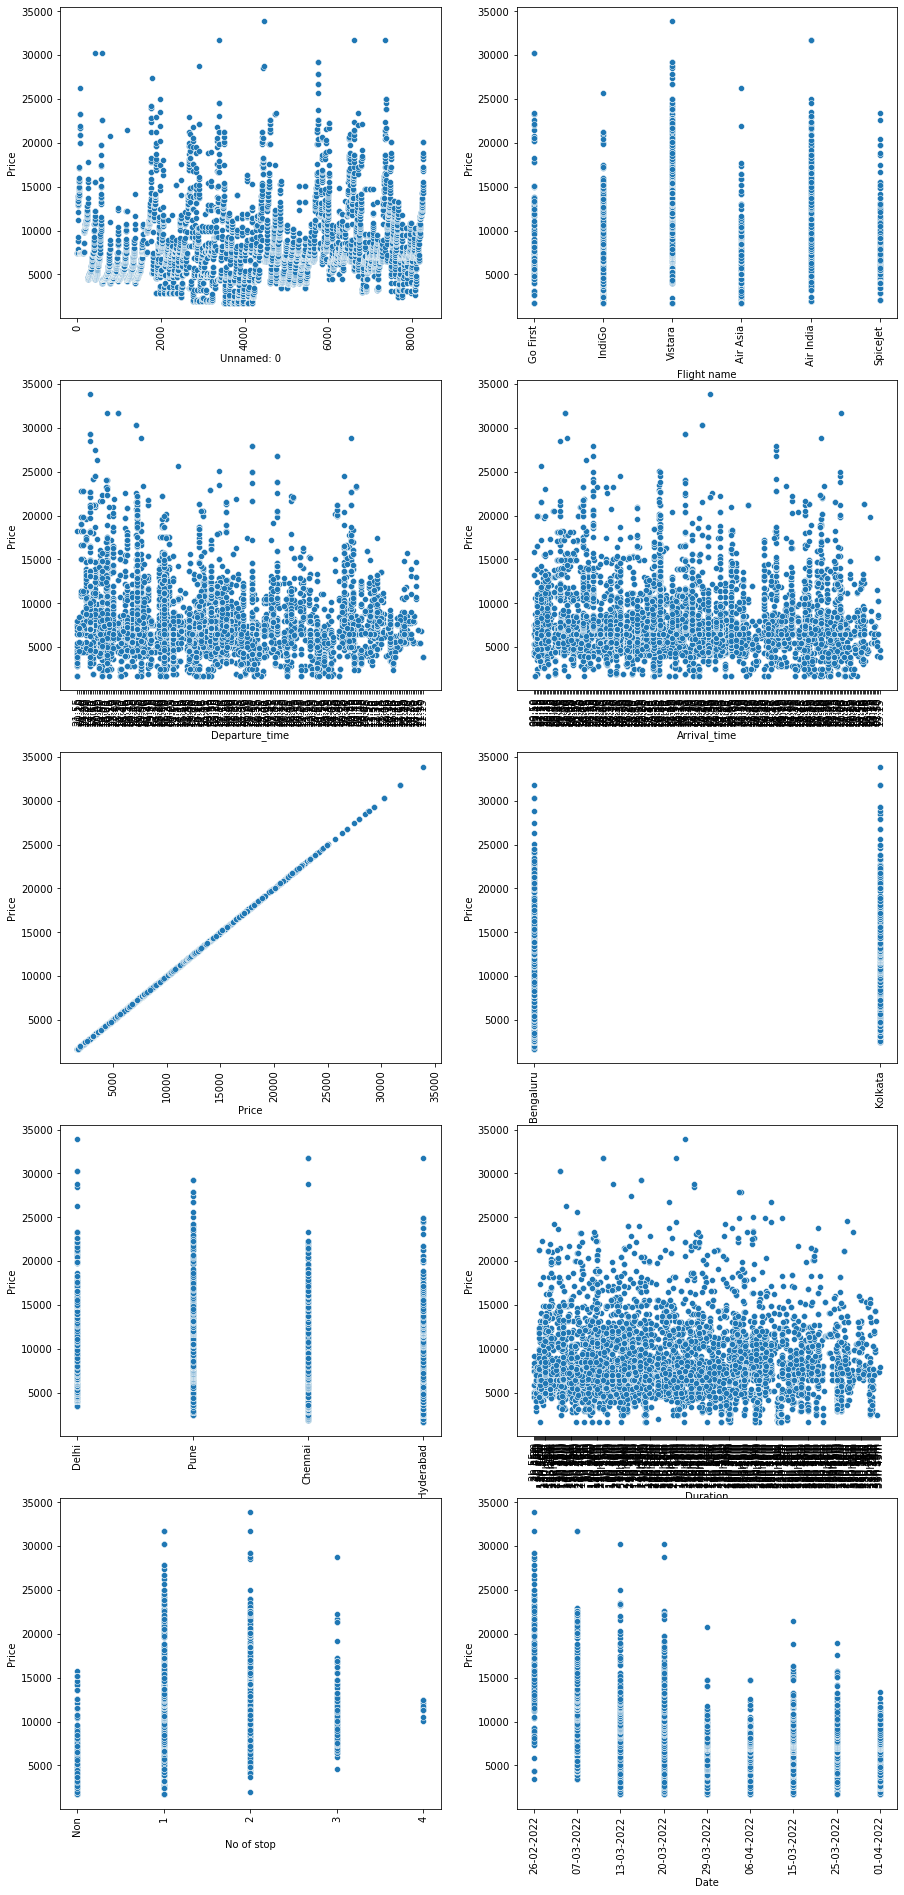

In [157]:
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.scatterplot(df[i],df["Price"])
        plt.xticks(rotation=90)
    plotnumber+=1
plt.show()

1. Vistara have maximun travel price as compare to other flights.

2. stop flight have high fare as compare to other stops.

3. flight to pune have maximum fare may be it is travelling by diferent route and haulting a bit in between

4. early morning flight are expensive as compare to afternoon flight.

In [158]:
# splitting date into date and month 
df["Date"]= pd.to_datetime(df["Date"])
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month

In [159]:
# splitting daparture time and arrival time
df["Departure_time"] = pd.to_datetime(df["Departure_time"])

df["dep_hour"] = df["Departure_time"].dt.hour

df["dep_min"] = df["Departure_time"].dt.minute

In [160]:
df["Arrival_time"] = pd.to_datetime(df["Arrival_time"])
df['Arr_hour'] = df["Arrival_time"].dt.hour
df['Arr_min'] = df["Arrival_time"].dt.minute

In [161]:
# Dropping unwanted columns 
df.drop(["Date","Departure_time","Arrival_time","Unnamed: 0"],axis=1,inplace=True)

In [162]:
# splitting duration into and hour and min in seperate column for better understanding
s=pd.to_timedelta(df['Duration'])
df['hours']=s.dt.components['hours']
df['minutes']=s.dt.components['minutes']

In [163]:
df.drop(["Duration"],inplace=True,axis=1)


In [164]:
# replacing non with 0 to make it a discrete column as model will not understan non
df["No of stop"] = df["No of stop"].replace("Non",0)

In [165]:
# changing datatype of int
df["No of stop"]= df["No of stop"].astype("int64")

In [168]:
df["No of stop"]= df["No of stop"].astype("int64")
# replacing source manually with 1 and 2
df["Source"] = df["Source"].replace("Bengaluru",1)
df["Source"] = df["Source"].replace("Kolkata",2)

In [169]:
df["No of stop"]= df["No of stop"].astype("int64")
# replacing source manually with 1 and 2
df["Source"] = df["Source"].replace("Bengaluru",1)
df["Source"] = df["Source"].replace("Kolkata",2)

# Label encoding:


In [170]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight name  8277 non-null   object
 1   Price        8277 non-null   int64 
 2   Source       8277 non-null   int64 
 3   Destination  8277 non-null   object
 4   No of stop   8277 non-null   int64 
 5   Day          8277 non-null   int64 
 6   Month        8277 non-null   int64 
 7   dep_hour     8277 non-null   int64 
 8   dep_min      8277 non-null   int64 
 9   Arr_hour     8277 non-null   int64 
 10  Arr_min      8277 non-null   int64 
 11  hours        8277 non-null   int64 
 12  minutes      8277 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 840.8+ KB


In [171]:
en=["Flight name","Destination"]


In [172]:
# for converting categorical to numericalcolumn as machine learing understands numerical value not text
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in df[en]:
    df[i]=label.fit_transform(df[i])
    
df


,Flight name,Price,Source,Destination,No of stop,Day,Month,dep_hour,dep_min,Arr_hour,Arr_min,hours,minutes
0,2,7488,1,1,0,26,2,21,55,0,50,2,55
1,3,7488,1,1,0,26,2,20,10,23,10,3,0
2,5,7489,1,1,0,26,2,21,10,23,45,2,35
3,5,7489,1,1,0,26,2,19,40,22,25,2,45
4,0,7489,1,1,0,26,2,19,25,22,15,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,5,18505,2,2,2,3,7,10,15,20,55,10,40
8273,5,18505,2,2,2,3,7,10,15,20,55,10,40
8274,5,18879,2,2,1,3,7,15,20,22,55,7,35
8275,5,20075,2,2,2,3,7,10,25,19,55,9,30


In [173]:
from sklearn.preprocessing import PowerTransformer


In [174]:
pt = PowerTransformer()
df[["Arr_hour","Day"]]= pt.fit_transform(df[["Arr_hour","Day"]])

<function matplotlib.pyplot.show(close=None, block=None)>

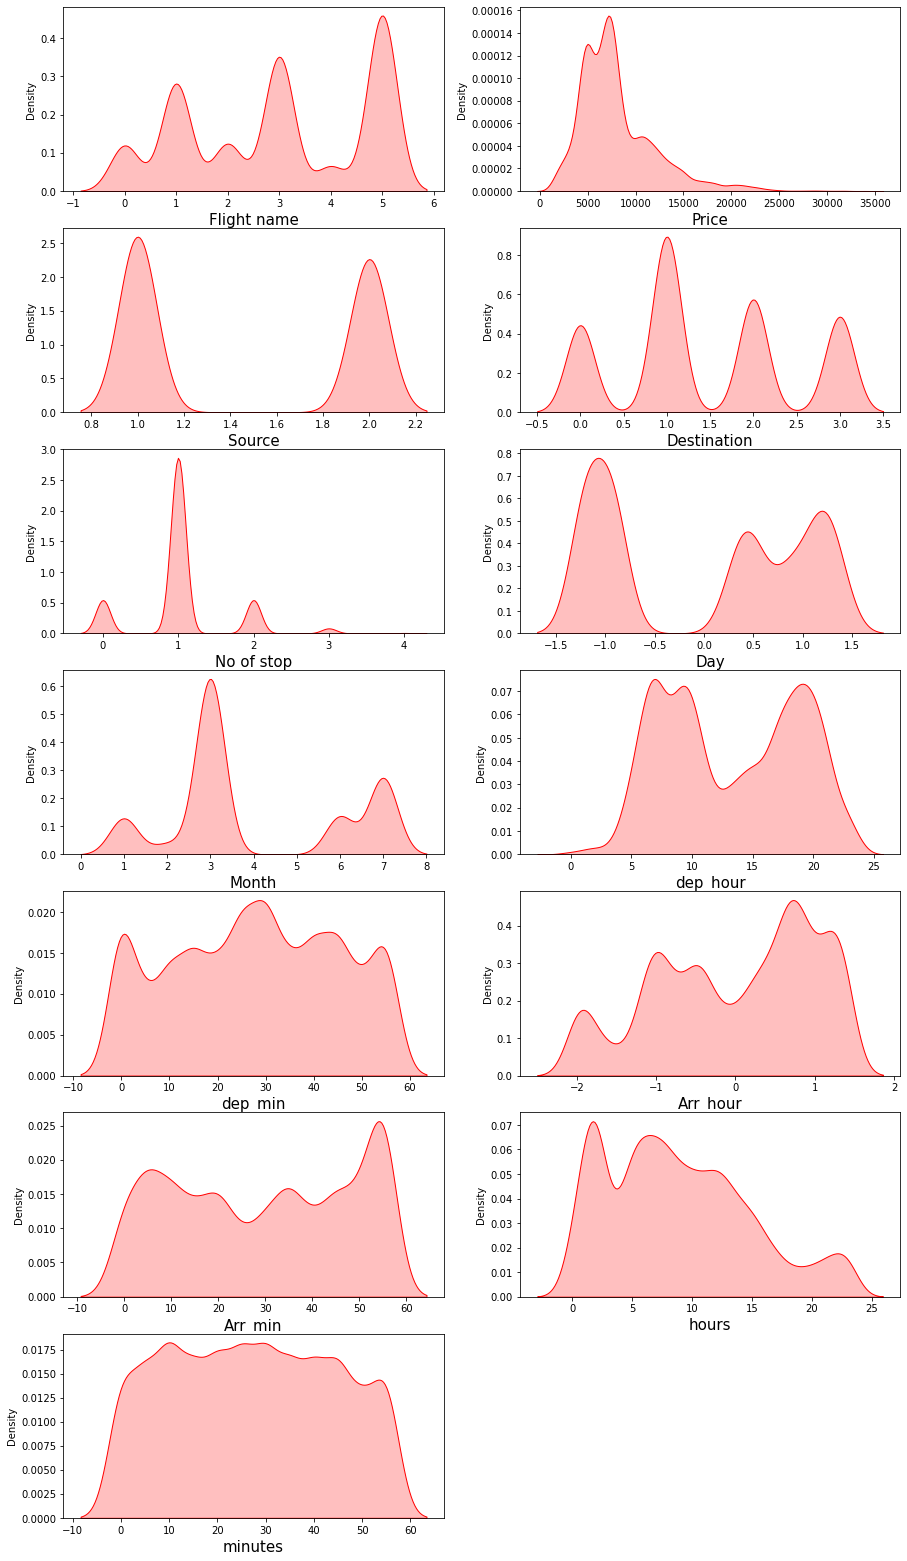

In [175]:
# univariate analysis
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 20:
        ax=plt.subplot(10,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True,color="r")
        plt.xlabel(i,fontsize=15)
        plotnumber+=1
plt.show

All columns are normally distributed except price which is target column.



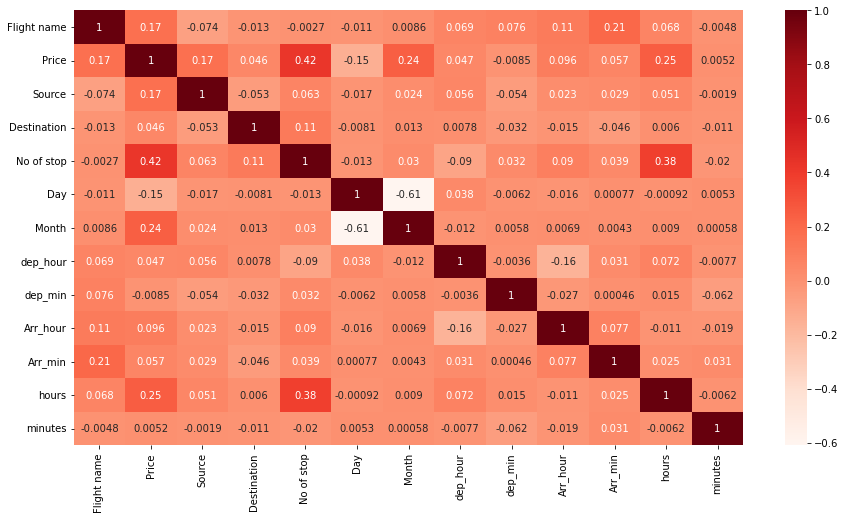

In [176]:
# multivariate analysis
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot = True,cmap = "Reds")
plt.show()

month and day is showing good correlation.



# Dividing data into X and Y


In [177]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [178]:
x.shape


(8277, 12)

In [179]:
y.shape


(8277,)

# scaling X values


In [180]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [181]:
pd.DataFrame(x).isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [182]:
pd.DataFrame(x).describe()


,0,1,2,3,4,5,6,7,8,9,10,11
count,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000
mean,0.591712,0.465869,0.486811,0.261145,0.475084,0.500101,0.574767,0.504992,0.594680,0.537612,0.384307,0.492339
std,0.347433,0.498864,0.337263,0.150030,0.397113,0.337620,0.241880,0.312266,0.296285,0.342247,0.259613,0.306668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.333333,0.250000,0.105841,0.333333,0.347826,0.272727,0.340161,0.181818,0.173913,0.181818
50%,0.600000,0.000000,0.333333,0.250000,0.609831,0.333333,0.565217,0.545455,0.657460,0.545455,0.347826,0.454545
75%,1.000000,1.000000,0.666667,0.250000,0.815549,0.833333,0.782609,0.727273,0.850612,0.909091,0.565217,0.727273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


data have been scalled after description.



# Spliting Train and Test data


In [183]:
from sklearn.model_selection import train_test_split


In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)


In [185]:
x_train.shape


(6042, 12)

In [186]:
x_test.shape


(2235, 12)

In [187]:
y_train.shape


(6042,)

In [188]:
y_test.shape


(2235,)

# Model building:


In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# LinearRegression


In [190]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.29662241183810967


In [191]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 12148178.722711014
MAE: 2443.3920460314944
r2_score: -1.4888903035946832


# RandomForestRegressor


In [192]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9777783591669779


In [193]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 3112929.054219342
MAE: 924.234581728823
r2_score: 0.7608105756595215


# DecisionTreeRegressor


In [194]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9993451530366741


In [195]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 4642345.511589858
MAE: 942.0440119313945
r2_score: 0.7226333577777797


# GradientBoostingRegressor


In [196]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.7384676828401688


In [197]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 5105796.723688463
MAE: 1516.6901384490313
r2_score: 0.500887882824184


# cross validation:


In [198]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 11644682.187494, 2956478.174062
RF    : 4339966.204229, 1333212.315666
DTR    : 8408537.607731, 2970149.929102
GBR    : 5439749.681697, 1378207.674526


# all metrics score selecting the RandomForestRegressor for GridSeachCV


# HYPER PARAMETER TUNING:


# GridSearchCV


# RandomForestRegressor

In [199]:
from sklearn.model_selection import GridSearchCV


In [200]:
RF=RandomForestRegressor()
param={
     'criterion':['mse','mae'],
    'n_estimators':[100, 200],
    'max_depth':[1],
   'max_features' : ["sqrt", "log2",],
}

In [201]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)


In [202]:
RF_grid.fit(x_train,y_train)
RF_grid_pred=RF_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


In [203]:
RF_grid.best_params_


{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [204]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 3112929.054219342
MAE: 924.234581728823
r2_score: 0.7608105756595215


<AxesSubplot:xlabel='Price', ylabel='Density'>

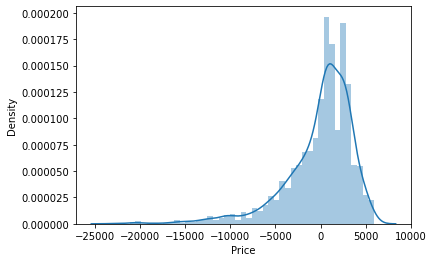

In [205]:
sns.distplot(RF_grid_pred-y_test)


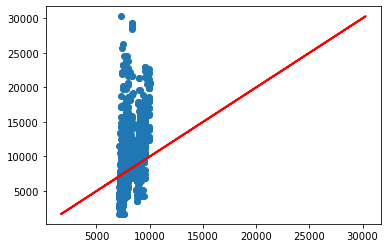

In [206]:
plt.scatter(RF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')


# Saving the model which i did my best


In [207]:
import joblib


In [208]:
joblib.dump(RF_grid.best_estimator_,'Flight_Price_Pediction.obj')


['Flight_Price_Pediction.obj']